# Image Features Extraction

### A document object package for fast extraction of features from segmentable images 


# Introduction 



<img src="1.png">

<img src="7c.png">

## Features extraction for spatial Classification of nuclei

<img src="2b.png">

<img src="3.png">

# Tutorial

In [14]:
% matplotlib inline
import matplotlib.pyplot as plt

import image_features_extraction.Images as FE

    
IMGS = FE.Images('../images')

IMGS


In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

import image_features_extraction.Images as fe

    
collection_images = fe.Images('../images')


# the iterator at work ...
for img in collection_images:
    print(img.file_name())
    


../images/ORG_8bit.tif
../images/ORG_bin.tif


## Collection objects and Iterators

<img src="4b.png">

## Show segmentation

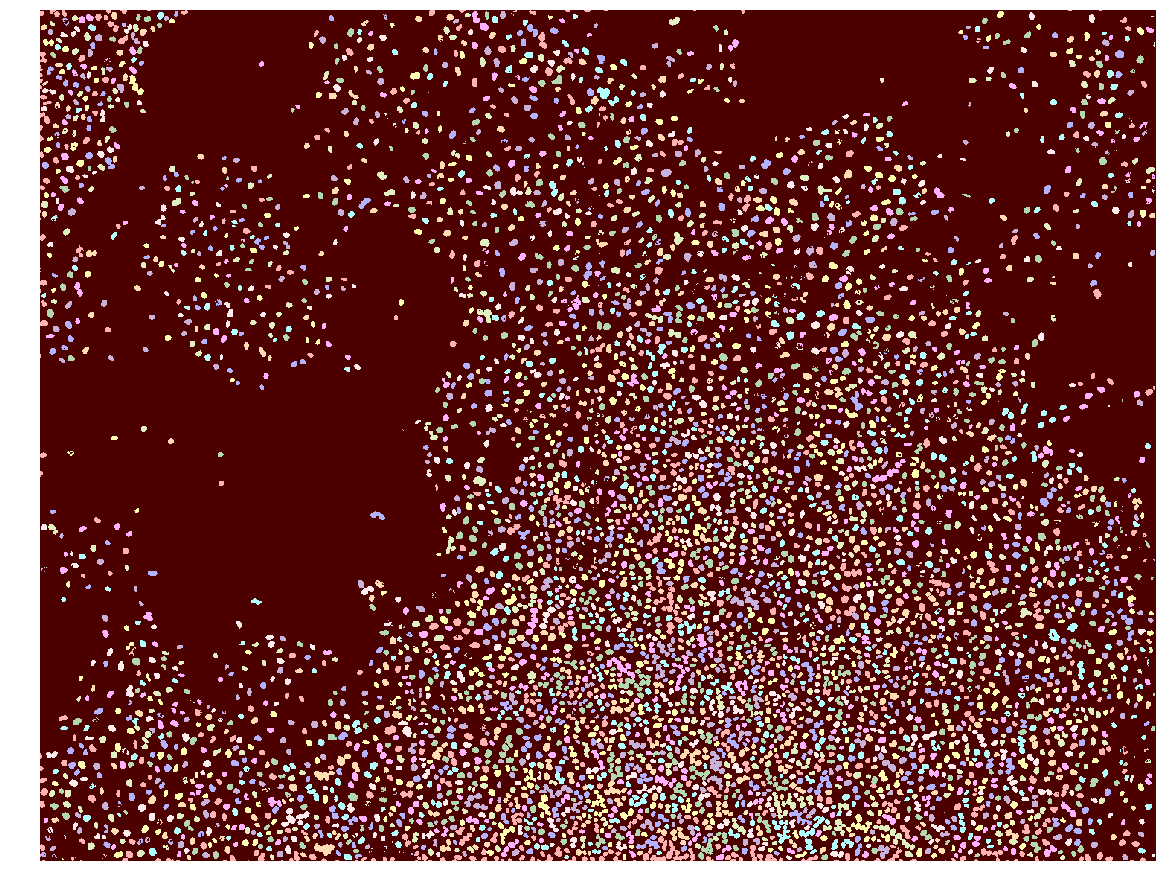

In [3]:
image = collection_images.item(0)

imgrgb = image.get_image_segmentation()


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(imgrgb)

ax.set_axis_off()
plt.show()


## Property values

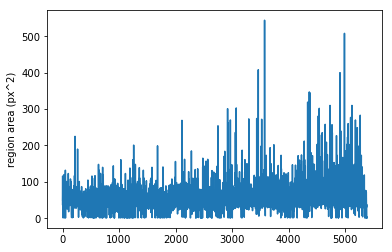

In [4]:


image = collection_images.item(0)


collection_regions = image.regions()


areas = collection_regions.prop_values('area')


plt.plot(areas)
plt.ylabel('region area (px^2)')

## Obtaining the features table from a single image

In [5]:
print('Num regions: {}'.format(collection_regions.count()))


df = collection_regions.get_features(['label', 'area','perimeter', 'centroid'], class_value=5)


df.head()


Num regions: 5900


,label,area,perimeter,centroid,class_name
0,22,64,28.278175,"(5.46875, 584.375)",5
1,23,86,33.556349,"(6.41860465116, 621.546511628)",5
2,24,100,35.556349,"(5.72, 1290.33)",5
3,25,50,24.142136,"(5.6, 23.04)",5
4,26,80,31.556349,"(7.325, 99.4625)",5


### Plot area vs perimeter and area histogram

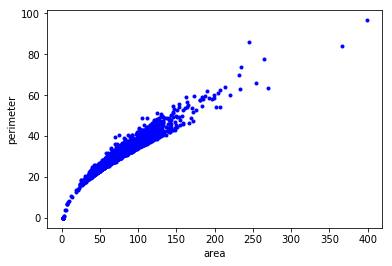

In [12]:

plt.plot(df.area, df.perimeter, '.b')
plt.xlabel('area')
plt.ylabel('perimeter')

(array([  22.,    5.,    2.,    1.,    2.,    7.,   16.,   35.,   63.,
         120.,  209.,  336.,  474.,  517.,  487.,  458.,  459.,  450.,
         419.,  366.,  301.,  252.,  180.,  144.,  116.,   92.,   63.,
          60.,   43.,   37.,   31.,   23.,   20.,   10.,    8.,   11.,
           9.,    5.,    5.,    4.,    4.,    2.,    4.,    2.,    0.,
           4.,    2.,    2.,    1.,    2.,    1.,    3.,    0.,    1.,
           0.,    1.,    0.,    0.,    3.,    0.,    0.,    1.,    0.,
           1.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   1.  ,    4.98,    8.96,   12.94,   16.92,   20.9 ,   24.88,
          28.86,   32.84,   36.82,   40.8 ,   44.78,   48.76,   52.74,
          56.72,   60.7 ,   64.68,   68.66,   72.64,   76.62,   80.6

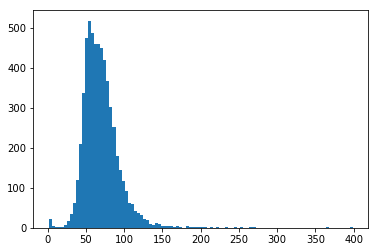

In [13]:
plt.hist(df.area,100)

### Show the region centroids

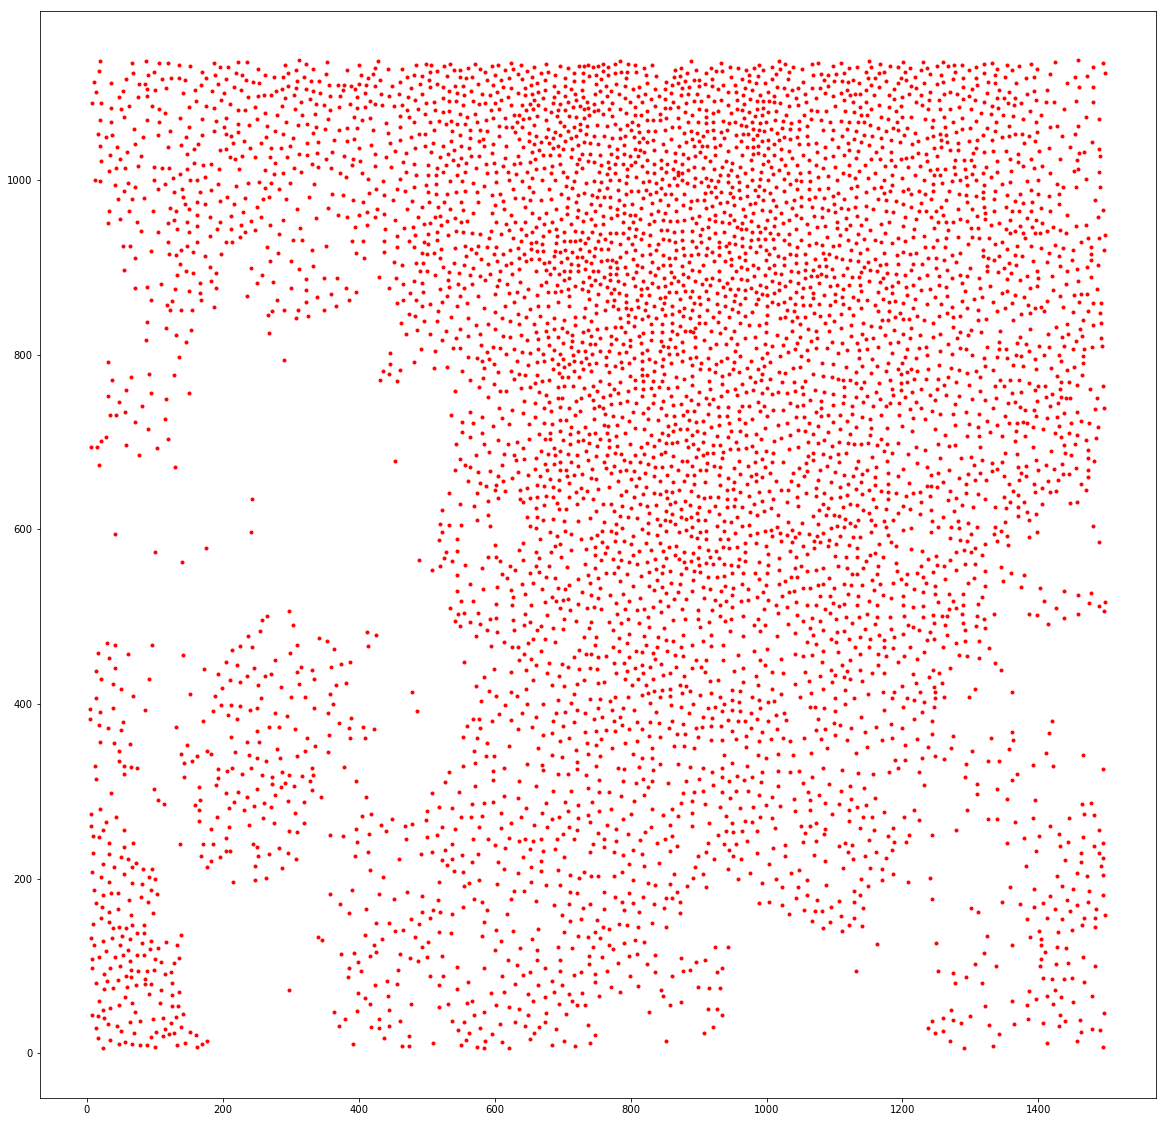

In [15]:

import numpy as np
a = np.array(df.centroid)
x=[]
y=[]
for i in a:
    x.append(i[0])
    y.append(i[1])

    
fig, axes = plt.subplots(figsize=(20, 20), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

plt.plot(y,x, '.r')

## Storage: Business and data layer 

<img src="8.png">

In [ ]:
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA')



In [10]:
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/INTO')

storage_name = '../images/DB.csv'
class_value = 'INTO'

for IMG in IMGS:
    print(IMG.file_name())
    
    REGS = IMG.regions()
    
    FEATURES = REGS.get_features(['area','perimeter', 'extent', 'equivalent_diameter', 'eccentricity'], class_value=class_value)
    
    FEATURES.save(storage_name, type_storage='file', do_append=True)
    
    
    

../images/INTO/CT_1.tif
../images/INTO/CT_2.tif


# Pytest: Units test

In [12]:
!py.test

============================= test session starts ==============================
platform darwin -- Python 3.5.3, pytest-3.1.3, py-1.4.34, pluggy-0.4.0
rootdir: /Users/remi/Google Drive/INSIGHT PRJ/PRJ/Image-Features-Extraction, inifile:
collected 0 items 

========================= no tests ran in 0.01 seconds =========================
